# Практическая работа №2: Корреляционный и регрессионный анализ

Выполнил студент гр. 0373 Морев Иван. Вариант №13

## Цель работы
Освоение основных понятий, связанных с корреляционной зависимостью между случайными величинами, статистическими гипотезами и проверкой их «справедливости». Ознакомление с основными положениями метода наименьших квадратов (МНК), со статистическими свойствами МНК оценок, с понятием функции регрессии и роли МНК в регрессионном анализе, с корреляционным отношением, как мерой тесноты произвольной (в том числе и линейной) корреляционной связи.

## Основные теоретические положения

*Вычисление коэффициента корреляции с помощью условных вариант:*
\begin{equation}r_\beta=\frac{1}{n}\sum_{i=1}^{k_u}\sum_{j=1}^{k_v}{n_{uv}u_iv_j}-\bar u\cdot\bar v\end{equation}

*Коэффициент корреляции Пирсона* $r_\beta$ – параметр, который служит для оценки силы линейной связи между $x$ и $y$. Знак $r_\beta$ означает, увеличивается величина или уменьшается.

*Доверительный интервал для с. в. z:* \begin{equation}\Biggl(z-\frac{t}{\sqrt{n-3}};z+\frac{t}{\sqrt{n-3}}\Biggl),\end{equation} где $z=arcth(r_\beta)$, $t$ получают из равенства $\Phi(t)= \frac{\gamma}{2}$.

*Доверительный интервал для коэффициента корреляции:*
$\bigl(th(z_l);th(z_u)\bigl)$

*Наблюдаемое значение с. в. для проверки статистической гипотезы о равенстве коэффициента корреляции нулю:* $T$набл = \begin{equation}r_\beta\frac{\sqrt{n-2}}{\sqrt{1-r_\beta^2}}\end{equation}
*Критическое значение с. в. для проверки статистической гипотезы о равенстве коэффициента корреляции нулю:* $T$крит$ = t(\alpha, df), df = n-2$.

*Область принятия гипотезы:* $|T$набл$| \lt T$крит.

*Средняя ошибка аппроксимации (приближения)* $A$ – показатель качества регрессии. $A \lt 7\%$ свидетельствует о хорошем выборе модели.
\begin{equation}A_y=\frac{1}{n}\sum_{i=1}^n\Big|\frac{\varepsilon {y_i}}{y_i}\Big|, A_x=\frac{1}{n}\sum_{i=1}^n\Big|\frac{\varepsilon {x_i}}{x_i}\Big|\end{equation}

*Уравнения средней квадратичной регрессии:*
\begin{equation}\bar y_x-\bar y=r_{xy}\frac{\sigma_y}{\sigma_x}(x-\bar x), \bar x_y-\bar x=r_{xy}\frac{\sigma_x}{\sigma_y}(y-\bar y)\end{equation}

*Корреляционные отношения:* 
\begin{equation}\eta_{yx}=\frac{\sigma_{\bar y_x}}{\sigma_y}=\frac{\sqrt{\sum_{n_x(\bar y_x-\bar y)^2}}}{\sqrt{\sum_{n_y(y-\bar y)^2}}}, \eta_{xy}=\frac{\sigma_{\bar x_y}}{\sigma_x}=\frac{\sqrt{\sum_{n_y(\bar x_y-\bar x)^2}}}{\sqrt{\sum_{n_x(x-\bar x)^2}}}\end{equation}

*Теоретический коэффициент детерминации* $R^2$ – показатель качества регрессии, который показывает долю дисперсии, объяснённую моделью регрессии.
\begin{equation}R_y^2=\frac{(\delta_y^*)^2}{\sigma_y^2}=\frac{\sum_{i=1}^n{(y_{x_i}-\bar y)^2}}{n\sigma_y^2}, R_x^2=\frac{(\delta_x^*)^2}{\sigma_x^2}=\frac{\sum_{i=1}^n{(x_{y_i}-\bar x)^2}}{n\sigma_x^2}\end{equation}

*Средняя квадратическая ошибка* $S_\varepsilon$ – показатель качества регрессии. Величину средней квадратической ошибки можно сравнить со средним квадратическим отклонением результативного признака. Средняя квадратическая ошибка, меньшая чем $\sigma$, говорит о целесообразности использования модели регрессии.
\begin{equation}S_{\varepsilon y}=\sqrt{\frac{\sum_{i=1}^n\varepsilon_{y_i}^2}{n-l}}, S_{\varepsilon x}=\sqrt{\frac{\sum_{i=1}^n\varepsilon_{x_i}^2}{n-l}},\end{equation}
где $l$ – число параметров в модели регрессии, $\varepsilon {y_i}=y_i-y_{x_i}$, $\varepsilon {x_i}=x_i-x_{y_i}$



## Постановка задачи

Из заданной генеральной совокупности сформировать выборку по второму признаку. Для системы двух случайных величин 𝑋 (первый признак) и 𝑌 (второй признак) сформировать двумерную выборку и найти статистическую оценку коэффициента корреляции, построить доверительный интервал для коэффициента корреляции и осуществить проверку статистической гипотезы о равенстве коэффициента корреляции нулю. Построить уравнения выборочных прямых среднеквадратической регрессии. Полученные линейные функции регрессии отобразить графически. Найти выборочное корреляционное отношение. Оценить адекватность моделей. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

In [4]:
import numpy as np
import math
from prettytable import PrettyTable
import matplotlib.pyplot as plt
from sympy import diff, symbols


In [70]:
x_main = [
1.94,
1.68,
1.15,
6.08,
2.69,
6.23,
2.43,
2.77,
4.06,
1.93,
3.45,
1.28,
1.45,
4.17,
2.08,
2.9,
1.88,
6.29,
4.13,
2.47,
1.62,
5.4,
5.39,
6.23,
5.69,
6.3,
1.57,
1.48,
2.81,
1.27,
6.06,
2.95,
2.63,
1.97,
5.82,
1.51,
1.15,
3.28,
3.08,
2.62,
3.29,
2.96,
6.23,
2.1,
3.64,
2.4,
3.17,
5.98,
3.13,
5.55,
3.77,
1.23,
4.27,
3.23,
1.67,
9.94,
2.05,
2.89,
5.5,
14.65,
2.62,
1.8,
2.56,
2.99,
2.49,
1.79,
3.24,
2.57,
2.76,
1.73,
2.88,
3.29,
6.48,
1.53,
9.43,
1.96,
3.09,
3.34,
0,
2.82,
4.15,
1.66,
2.62,
2.45,
2.81,
1.98,
2.57,
1.66,
2.98,
7.16,
2.9,
2,
1.84,
1.7,
3.46,
2.02,
4.18,
4.95,
2.72,
2.98,
4.53,
4.5,
1.48,
12,
5.06,
4.66,
5.24,
3.54,
]
y_main = [
3.33,
4.06,
10.35,
1.41,
2.71,
1.44,
3.32,
2.49,
1.94,
3.33,
2.5,
9.04,
5.29,
1.59,
2.95,
2.47,
3.22,
1.35,
1.67,
2.53,
3.92,
1.44,
1.52,
1.34,
1.36,
1.41,
4.07,
5,
2.06,
6.65,
1.35,
2.08,
2.45,
3.14,
1.4,
4.78,
10.75,
1.85,
2.35,
2.45,
1.8,
2.45,
1.38,
3,
1.77,
3.11,
1.93,
1.36,
2.38,
1.47,
1.78,
8.13,
1.53,
2.5,
5.17,
1.19,
2.73,
2.09,
1.4,
1.15,
2.57,
3.43,
2.44,
2.05,
2.71,
3.56,
1.86,
2.57,
2.58,
3.21,
2.54,
1.94,
1.41,
4.5,
1.2,
3.18,
1.99,
1.78,
15.6,
2.1,
1.61,
3.71,
2.39,
2.59,
2.39,
3.52,
2.79,
3.84,
2,
1.29,
2.42,
3.15,
3.42,
3.76,
1.83,
3.14,
1.6,
1.5,
2.53,
2.08,
1.58,
1.61,
4.97,
1.16,
1.48,
1.57,
1.46,
1.84,
]
print(y_main)

[3.33, 4.06, 10.35, 1.41, 2.71, 1.44, 3.32, 2.49, 1.94, 3.33, 2.5, 9.04, 5.29, 1.59, 2.95, 2.47, 3.22, 1.35, 1.67, 2.53, 3.92, 1.44, 1.52, 1.34, 1.36, 1.41, 4.07, 5, 2.06, 6.65, 1.35, 2.08, 2.45, 3.14, 1.4, 4.78, 10.75, 1.85, 2.35, 2.45, 1.8, 2.45, 1.38, 3, 1.77, 3.11, 1.93, 1.36, 2.38, 1.47, 1.78, 8.13, 1.53, 2.5, 5.17, 1.19, 2.73, 2.09, 1.4, 1.15, 2.57, 3.43, 2.44, 2.05, 2.71, 3.56, 1.86, 2.57, 2.58, 3.21, 2.54, 1.94, 1.41, 4.5, 1.2, 3.18, 1.99, 1.78, 15.6, 2.1, 1.61, 3.71, 2.39, 2.59, 2.39, 3.52, 2.79, 3.84, 2, 1.29, 2.42, 3.15, 3.42, 3.76, 1.83, 3.14, 1.6, 1.5, 2.53, 2.08, 1.58, 1.61, 4.97, 1.16, 1.48, 1.57, 1.46, 1.84]


In [71]:
x_main.sort()
length=[1]*108
for i in range(108):
    length[i]=x_main.count(x_main[i])
for i in range(108):
    for j in range(i+1,108):
        if x_main[i]==x_main[j]:
            length[j]=0
import math
r=x_main[108-1]-x_main[0]
ster=math.ceil(1+math.log2(108))
h=r/ster
y1=[0]*ster
u=[0]*ster
y1[0]=x_main[0]
u[0]=x_main[0]+h
for i in range(1,ster):
    y1[i]= x_main[0]+h*i
    u[i]= x_main[0]+h*(i+1)
k=[0]*ster
ser=[0]*ster
k[0]=1
for i in range(len(y1)):
    ser[i]=(y1[i]+u[i])/2
    for j in range(108):
        if (y1[i]<x_main[j]<=u[i]):
            k[i]+=1
mod=0
for i in range(ster):
    mod+=k[i]*ser[i]/108
dis=0
for i in range(ster):
    dis+=k[i]*(ser[i]-mod)**2/108
sko=np.sqrt(dis)

### 1. Провести статистическую обработку второй выборки в объеме практической работы №1 с целью определения точечных статистических оценок параметров распределения исследуемого признака (математического ожидания, дисперсии, среднеквадратичного отклонения, асимметрии, эксцесса, моды, медианы и коэффициента вариации). Оформить результаты в виде таблиц, сделать выводы

In [86]:
y_main.sort()
length2=[1]*108
for i in range(108):
    length2[i]=y_main.count(y_main[i])
for i in range(108):
    for j in range(i+1,108):
        if y_main[i]==y_main[j]:
            length2[j]=0
r2=y_main[108-1]-y_main[0]
ster2=math.ceil(1+math.log2(108))
h2=r2/ster2
y2=[0]*ster2
u2=[0]*ster2
y2[0]=y_main[0]
u2[0]=y_main[0]+h2
for i in range(1,ster2):
    y2[i]= y_main[0]+h2*i
    u2[i]= y_main[0]+h2*(i+1)
k2=[0]*ster2
ser2=[0]*ster2
k2[0]=1
for i in range(len(y2)):
    ser2[i]=(y2[i]+u2[i])/2
    for j in range(108):
        if (y2[i]<y_main[j]<=u2[i]):
            k2[i]+=1
p12=[0]*108
p1_12=[0]*ster2
kl_22=[0]*ster2
for i in range(len(y2)):
    kl_22[i]=k2[i]/108
for i in range(108):
    p12[i]+=length2[i]/108
kl22=[0]*ster2
p1_12[0]=kl_22[0]
kl22[0]=k2[0]
for i in range(1,len(y2)):
            p1_12[i]=p1_12[i-1]+kl_22[i]
            kl22[i]=kl22[i-1]+k2[i]
table = PrettyTable(["i","(y(i-1);y(i)]","y(cp)","n(i)","p","sum n(i)","sum p(i)"])
table.add_row([1,[y2[0],u2[0]],ser2[0],k2[0],round(kl_22[0],3),kl22[0],round(p1_12[0],3)])
for i in range(1,len(y2)):
    table.add_row([i+1,[y2[i],u2[i]],ser2[i],k2[i],round(kl_22[i],3),kl22[i],round(p1_12[i],3)])
table.add_row([" "," "," Cумма",sum(k2),round(sum(kl_22)),"-","-"])
print(table)


mod2=0
for i in range(ster2):
    mod2+=k2[i]*ser2[i]/108
dis2=0
for i in range(ster2):
    dis2+=k2[i]*(ser2[i]-mod2)**2/108
sko2=np.sqrt(dis2)
isp_dis2=108/(108-1)*dis2
isp_sko2=np.sqrt(isp_dis2)
sum_12=0
ui2=[0]*ster2
l12,l22,l32,l42,l52=[0]*ster2,[0]*ster2,[0]*ster2,[0]*ster2,[0]*ster2
for i in range(len(y2)):
    sum_12+=k2[i]
    if sum_12>50:
        ind2=i
        break
for i in range(len(y2)):
        ui2[i]=i-ind2
for i in range(len(y2)):
    l12[i]=k2[i]*ui2[i]
    l22[i]=k2[i]*(ui2[i]**2)
    l32[i]=k2[i]*(ui2[i]**3)
    l42[i]=k2[i]*(ui2[i]**4)
    l52[i]=k2[i]*((ui2[i]+1)**4)
k_a2=((sum(l32)/108-3*sum(l22)/108*sum(l12)/108+2*(sum(l12)/108)**3)*h2**3)/sko2**3
k_e2=((sum(l42)/108-4*sum(l32)/108*sum(l12)/108+6*sum(l22)/108*(sum(l12)/108)**2-3*(sum(l12)/108)**4)*h2**4)/sko2**4-3
k_v2=sko2/mod2*100
max2=0;
for i in range(ster2):
    if k2[i]>max2:
        max2=k2[i]
        md2=i
moda2=y2[md2]+h2*((k2[md2]-k2[md2-1])/((k2[md2]-k2[md2-1])+(k2[md2]-k2[md2+1])))
dispersia2=y2[ind2]+h2*(0.5-p1_12[ind2-1])/(kl_22[ind2])
table2 = PrettyTable(["Выб. ср.","Дис-ия","СКО","Исп.дис-ия","Исп. СКО","Коэф.ас-ии","Коэф.эксцесса","Медиана","Мода","Коэф.вар-ии"])
table2.add_row([round(mod2,3),round(dis2,2),round(sko2,3),round(isp_dis2,3),round(isp_sko2,3),round(k_a2,4),round(k_e2,4),round(dispersia2,3),round(moda2,3),round(k_v2,3)])
print(table2)

+---+--------------------------------+--------------------+------+-------+----------+----------+
| i |         (y(i-1);y(i)]          |       y(cp)        | n(i) |   p   | sum n(i) | sum p(i) |
+---+--------------------------------+--------------------+------+-------+----------+----------+
| 1 |        [1.15, 2.95625]         | 2.0531249999999996 |  75  | 0.694 |    75    |  0.694   |
| 2 |  [2.95625, 4.762499999999999]  | 3.8593749999999996 |  22  | 0.204 |    97    |  0.898   |
| 3 |  [4.762499999999999, 6.56875]  | 5.6656249999999995 |  5   | 0.046 |   102    |  0.944   |
| 4 |        [6.56875, 8.375]        |      7.471875      |  2   | 0.019 |   104    |  0.963   |
| 5 |       [8.375, 10.18125]        |      9.278125      |  1   | 0.009 |   105    |  0.972   |
| 6 | [10.18125, 11.987499999999999] |     11.084375      |  2   | 0.019 |   107    |  0.991   |
| 7 | [11.987499999999999, 13.79375] |     12.890625      |  0   |  0.0  |   107    |  0.991   |
| 8 |        [13.79375, 15.6] 

Выводы: Произведена статистическая обработка второй выборки. Определены точечные статистические оценки параметров распределения исследуемого признака (математического ожидания, дисперсии, среднеквадратичного отклонения, асимметрии, эксцесса, моды, медианы и коэффициента вариации). Коэф. эксцесса > 0, следовательно можно сказать, что острая вершина, пик выше, чем пик нормального распределения. Коэф. вариации > 33, следовательно выборка неоднородна

### 2. Построить двумерный интервальный вариационный ряд, оформить в виде таблицы

In [73]:
zer= np.zeros((ster2, ster2))
zer[0][0]=2
table3 = PrettyTable(["Y|X","[ 0 , 1.83125 ]","( 1.83125 , 3.6625 ]","( 3.6625 , 5.49375 ]","( 5.49375 , 7.325 ]","( 7.325 , 9.15625 ]","( 9.15625 , 10.9875 ]","( 10.9875 , 12.81875 ]","( 12.81875 , 14.65 ]","ny"])
table3._max_width = {"Y|X":17}
table3.padding_width = 0
x_m=x_main.copy()
y_m=y_main.copy()
for i in range(ster2):
    for j in range(ster):
        for l in range(108):
            if (y2[i]<y_m[l]<=u2[i])&(y1[j]<x_m[l]<=u[j]):
                zer[i][j]+=1
for i in range(ster):
    table3.add_row([(round(y2[i],1),round(u2[i],1)),round(zer[i][0]),round(zer[i][1]),round(zer[i][2]),round(zer[i][3]),round(zer[i][4]),round(zer[i][5]),round(zer[i][6]),round(zer[i][7]),round(sum(zer[i]))])
rex=[0]*ster
for i in range(ster):
    for j in range(ster2):
        rex[i]+=zer[j][i]
table3.add_row(["nx",round(rex[0]),round(rex[1]),round(rex[2]),round(rex[3]),round(rex[4]),round(rex[5]),round(rex[6]),round(rex[7]),round(sum(rex))])
print(table3)

+------------+---------------+--------------------+--------------------+-------------------+-------------------+---------------------+----------------------+--------------------+---+
|    Y|X     |[ 0 , 1.83125 ]|( 1.83125 , 3.6625 ]|( 3.6625 , 5.49375 ]|( 5.49375 , 7.325 ]|( 7.325 , 9.15625 ]|( 9.15625 , 10.9875 ]|( 10.9875 , 12.81875 ]|( 12.81875 , 14.65 ]| ny|
+------------+---------------+--------------------+--------------------+-------------------+-------------------+---------------------+----------------------+--------------------+---+
| (1.1, 3.0) |       22      |         54         |         0          |         0         |         0         |          0          |          0           |         0          | 76|
| (3.0, 4.8) |       0       |         0          |         15         |         7         |         0         |          0          |          0           |         0          | 22|
| (4.8, 6.6) |       0       |         0          |         0          |         5   

### 3. По полученному двумерному интервальному вариационному ряду сформировать условные варианты и по полученным условным вариантам построить корреляционную таблицу, сделать выводы

In [87]:
max1=0
max2=0
for i in range(ster):
    if sum(zer[i])>max2:
        max2=sum(zer[i])
        g2=i
    if rex[i]>max1:
        max1=rex[i]
        g1=i
vj=[0]*ster
for i in range(ster):
    vj[i]=i-g2
table4 = PrettyTable(["v|u ",-g1,1-g1,2-g1,3-g1,4-g1,5-g1,6-g1,7-g1,"Ui","vU"])
usi,vu=[0]*ster,[0]*ster
usi2,vu2=[0]*ster,[0]*ster
for i in range(ster):
    usi[i]=zer[i][0]*(-g1)+zer[i][1]*(1-g1)+zer[i][2]*(2-g1)+zer[i][3]*(3-g1)+zer[i][4]*(4-g1)+zer[i][5]*(5-g1)+zer[i][6]*(6-g1)+zer[i][7]*(7-g1)
    vu[i]=usi[i]*vj[i] 
    table4.add_row([vj[i],zer[i][0],zer[i][1],zer[i][2],zer[i][3],zer[i][4],zer[i][5],zer[i][6],zer[i][7],usi[i],vu[i]])  
for i in range(ster):
    usi2[i]=zer[0][i]*vj[0]+zer[1][i]*vj[1]+zer[2][i]*vj[2]+zer[3][i]*vj[3]+zer[4][i]*vj[4]+zer[5][i]*vj[5]+zer[6][i]*vj[6]+zer[7][i]*vj[7]
    vu2[i]=usi2[i]*(i-g1)
if sum(vu)==sum(vu2):
    pr=sum(vu)
else:
    pr='Суммы отличны'
table4.add_row(["Vj",usi2[0],usi2[1],usi2[2],usi2[3],usi2[4],usi2[5],usi2[6],usi2[7],"-",sum(vu)]) 
table4.add_row(["Vu",vu2[0],vu2[1],vu2[2],vu2[3],vu2[4],vu2[5],vu2[6],vu2[7],sum(vu2),pr]) 
print(table4)

+------+------+------+------+------+-----+------+------+------+-------+-------+
| v|u  |  -1  |  0   |  1   |  2   |  3  |  4   |  5   |  6   |   Ui  |   vU  |
+------+------+------+------+------+-----+------+------+------+-------+-------+
|  0   | 22.0 | 54.0 | 0.0  | 0.0  | 0.0 | 0.0  | 0.0  | 0.0  | -22.0 |  -0.0 |
|  1   | 0.0  | 0.0  | 15.0 | 7.0  | 0.0 | 0.0  | 0.0  | 0.0  |  29.0 |  29.0 |
|  2   | 0.0  | 0.0  | 0.0  | 5.0  | 0.0 | 0.0  | 0.0  | 0.0  |  10.0 |  20.0 |
|  3   | 0.0  | 0.0  | 0.0  | 2.0  | 0.0 | 0.0  | 0.0  | 0.0  |  4.0  |  12.0 |
|  4   | 0.0  | 0.0  | 0.0  | 0.0  | 0.0 | 1.0  | 0.0  | 0.0  |  4.0  |  16.0 |
|  5   | 0.0  | 0.0  | 0.0  | 0.0  | 0.0 | 1.0  | 1.0  | 0.0  |  9.0  |  45.0 |
|  6   | 0.0  | 0.0  | 0.0  | 0.0  | 0.0 | 0.0  | 0.0  | 0.0  |  0.0  |  0.0  |
|  7   | 0.0  | 0.0  | 0.0  | 0.0  | 0.0 | 0.0  | 0.0  | 1.0  |  6.0  |  42.0 |
|  Vj  | 0.0  | 0.0  | 15.0 | 23.0 | 0.0 | 9.0  | 5.0  | 7.0  |   -   | 164.0 |
|  Vu  | -0.0 | 0.0  | 15.0 | 46.0 | 0.0

Вывод: суммы равны => проверка пройдена

### 4. Исходя из результатов корреляционной таблицы вычислить коэффициент корреляции, сделать выводы

In [75]:
modu=0
modv=0
modu2=0
modv2=0
for i in range(ster):
    modu+=rex[i]*(i-g1)/108
    modv+=sum(zer[i])*vj[i]/108
    modu2+=rex[i]*(i-g1)**2/108
    modv2+=sum(zer[i])*vj[i]**2/108
kf1=modu2-(modu)**2
kf2=modv2-(modv)**2
kk=(sum(vu)-108*modu*modv)/(108*np.sqrt(kf1)*np.sqrt(kf2))
print("Коэффициент корреляции = ", round(kk,4))


Коэффициент корреляции =  0.9093


Знак к.к. влияет на изменение величин после увеличения или уменьшения, к.к. > 0 => увеличение/уменьшение одной величины влечет увеличение/уменьшение соответственно другой величины

### 5. Построить доверительный интервал для коэффициента корреляции при уровне значимости 𝛾 ∈ {0.95, 0.99}, сделать выводы

In [76]:
ten=math.atanh(kk)
t11=math.tanh(ten-1.96/(np.sqrt(108-3)))
t12=math.tanh(ten+1.96/(np.sqrt(108-3)))
t21=math.tanh(ten-2.58/(np.sqrt(108-3)))
t22=math.tanh(ten+2.58/(np.sqrt(108-3)))
print("Доверительный интервал с надёжностью 0.95: (",round(t11,3),";",round(t12,3),")")
print("Доверительный интервал с надёжностью 0.99: (",round(t21,3),";",round(t22,3),")")

Доверительный интервал с надёжностью 0.95: ( 0.87 ; 0.937 )
Доверительный интервал с надёжностью 0.99: ( 0.854 ; 0.944 )


Вывод: Коэф. корреляции попадает в построенные доверительные интервалы

### 6. Осуществить проверку статистической гипотезы о равенстве коэффициента корреляции нулю при заданном уровне значимости 𝛼 = 0.05, сделать выводы

In [92]:
nabl=kk*(np.sqrt(108-2))/(np.sqrt(1-kk**2))
krit=1.9802722
if abs(nabl)<krit:
    print("Гипотеза К.К.=0 принимается")
else:
    print("Гипотеза К.К.=0 не принимается")

Гипотеза К.К.=0 не принимается


Вывод: гипотеза $H_{0}$ отвергается, принимается гипотеза $H_{1}$, о том, что К.К. не равен нулю

### 7. Для заданной выборки построить уравнения средней квадратичной регрессии 𝑥 на 𝑦 и 𝑦 на 𝑥 соответственно. Отобразить полученные прямые на множестве выборки. Объяснить результаты

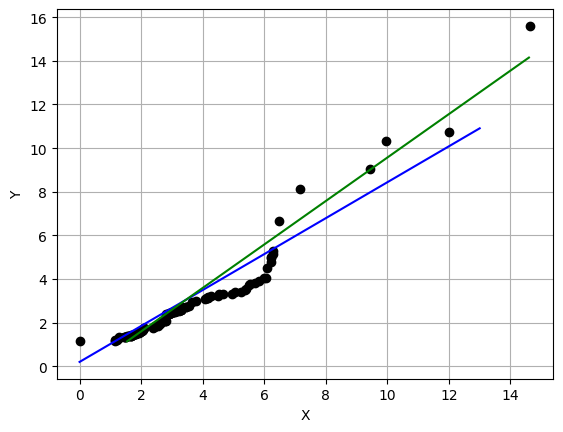

In [78]:
for i in range(108):
    plt.plot(x_m[i],y_m[i],'ko')
l=int(u[7]-y1[0])
gr_y=[0]*l
ln=[0]*l
for i in range(l):
    ln[i]=i+y1[0]
    gr_y[i]=(kk*sko2*((i+y1[0])-mod))/sko+mod2  
plt.plot(ln,gr_y,'b')
l2=int(u2[7]-y2[0])
gr_x=[0]*l2
ln2=[0]*l2
for i in range(l2):
    ln2[i]=i+y2[0]
    gr_x[i]=(kk*sko*((i+y2[0])-mod2))/sko2+mod
plt.plot(gr_x,ln2,'g')
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.show()

Вывод: с увеличением одной величины следует увеличение другой => положительность К.К. подтверждается

### 8. Вычислить корреляционные отношения 𝜂𝑦𝑥 и 𝜂𝑥𝑦. Убедиться, что неравенства 𝜂𝑦𝑥 > |𝑟𝑥𝑦| и 𝜂𝑥𝑦 > |𝑟𝑥𝑦| выполняются. Сделать выводы

In [98]:
disyx=0
disy=0
disxy=0
disx=0
ymod=0
xmod=0
nxy=[0]*ster
nyx=[0]*ster
for i in range(ster):
    ymod+=sum(zer[i])*ser2[i]/108
    xmod+=rex[i]*ser[i]/108
    for j in range(ster):
        nyx[i]+=ser2[j]*zer[j][i]/rex[i]
        nxy[i]+=(ser[j])*zer[i][j]/(sum(zer[i]))
for i in range(ster):
    disyx+=rex[i]*(nyx[i]-ymod)**2/108
    disxy+=sum(zer[i])*(nxy[i]-xmod)**2/108
    disy+=sum(zer[i])*(ser2[i]-ymod)**2/108
    disx+=rex[i]*(ser[i]-xmod)**2/108
n1=np.sqrt(disyx)/np.sqrt(disy)
n2=np.sqrt(disxy)/np.sqrt(disx)
print("Выборочное корреляционное отношение YX: ", round(n1,3))
print("Выборочное корреляционное отношение XY: ", round(n2,3))
if (n1>=kk)&(n2>=kk):
    print("Нер-ва выполняются")
else:
    print("Нер-ва не выполняются")
print("Коэффициент корреляции:", round(kk,3))

Выборочное корреляционное отношение YX:  nan
Выборочное корреляционное отношение XY:  nan
Нер-ва не выполняются
Коэффициент корреляции: 0.909


/tmp/ipykernel_55281/1272773408.py:13: RuntimeWarning: invalid value encountered in double_scalars
  nyx[i]+=ser2[j]*zer[j][i]/rex[i]
/tmp/ipykernel_55281/1272773408.py:14: RuntimeWarning: invalid value encountered in double_scalars
  nxy[i]+=(ser[j])*zer[i][j]/(sum(zer[i]))


Вывод: 

### 9. Для заданной выборки построить корреляционную кривую параболического вида 𝑦 = 𝛽0+𝛽1𝑥+𝛽2𝑥^2. Отобразить полученную кривую на множестве выборки. Сделать выводы

$ 2x^2(ax^2+bx+c-y) $  
$ 2x(ax^2+bx+c-y) $  
$ 2ax^2+2bx+2c-2y $  
$\begin{cases}
 & nc+b\sum_{i=1}^{n}x_{i}+a\sum_{i=1}^{n}x_{i}^{2}=\sum_{i=1}^{n}y_{i}\\
 & c\sum_{i=1}^{n}x_{i}+b\sum_{i=1}^{n}x_{i}^{2}+\sum_{i=1}^{n}x_{i}^{3}=\sum_{i=1}^{n}y_{i}x_{i}\\
 & c\sum_{i=1}^{n}x_{i}^{2}+b\sum_{i=1}^{n}x_{i}^{3}+\sum_{i=1}^{n}x_{i}^{4}=\sum_{i=1}^{n}y_{i}x_{i}^{2}
\end{cases}$

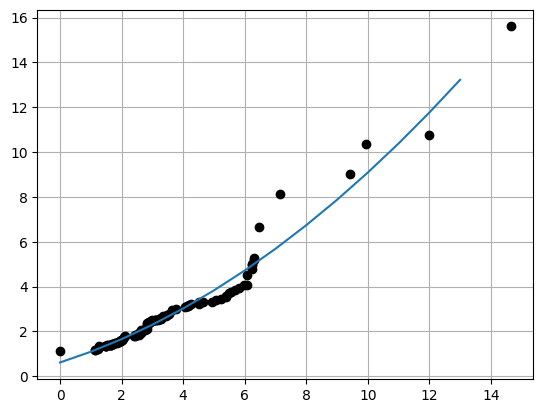

In [80]:
sx=0
sx_2=0
sx_3=0
sx_4=0
sy=0
sxy=0
sxxy=0
for i in range(108):
    sx+=x_main[i]
    sx_2+=x_main[i]**2
    sx_3+=x_main[i]**3
    sx_4+=x_main[i]**4
    sy+=y_main[i]
    sxy+=x_main[i]*y_main[i]
    sxxy+=x_main[i]**2*y_main[i]
leftside=np.array([[108,sx,sx_2],[sx,sx_2,sx_3],[sx_2,sx_3,sx_4]])
rightside=np.array([sy,sxy,sxxy])
o=np.linalg.inv(leftside).dot(rightside)
for i in range(108):
    plt.plot(x_m[i],y_m[i],'ko')
l3=[0]*l
p_y=[0]*l
for i in range(l):
    l3[i]=i+y1[0]
    p_y[i]=o[0]+o[1]*(i+y1[0])+o[2]*(i+y1[0])**2
plt.plot(l3,p_y)
plt.grid()
plt.show()

Вывод:

### 10. Для заданной выборки построить нелинейные корреляционные кривые c помощью МНК в зависимости от номера варианта

/tmp/ipykernel_55281/3257163196.py:17: RuntimeWarning: divide by zero encountered in double_scalars
  p_y2[i]=o2[0]+o2[1]/(i+y1[0])


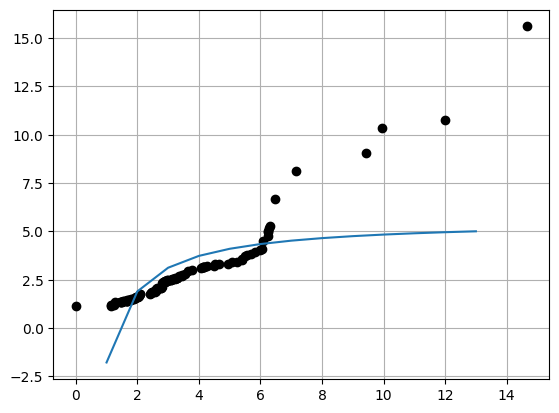

In [81]:
ox=0
ox2=0
raz=0
for i in range(108):
    if (x_main[i]!=0):
        ox+=1/x_main[i]
        ox2+=1/x_main[i]**2
        raz+=y_main[i]/x_main[i]
left=np.array([[108,ox],[ox,ox2]])
right=np.array([sy,raz])
o2=np.linalg.inv(left).dot(right)
for i in range(108):
    plt.plot(x_m[i],y_m[i],'ko')
l4,p_y2=[0]*l,[0]*l
for i in range(l):
    l4[i]=i+y1[0]
    p_y2[i]=o2[0]+o2[1]/(i+y1[0])
plt.plot(l4,p_y2)
plt.grid()
plt.show()

Вывод:

### 11. Вычислить следующие показатели качества регрессии для каждого из четырёх уравнений и сделать выводы: 
### • теоретический коэффициент детерминации 𝑅2
### • средняя квадратическая ошибка 𝑆𝜀;
### • средняя ошибка аппроксимации (приближения) 𝐴.

In [83]:
pol,pol2,pol3,pol4=[0]*108,[0]*108,[0]*108,[0]*108
odis,odis2,odis3,odis4=[0]*108,[0]*108,[0]*108,[0]*108
dr=0
dr2=0
dr3=0
dr4=0
ar=0
ar2=0
ar3=0
ar4=0
for i in range(108):
    pol[i]=(kk*sko2*(x_m[i]-mod))/sko+mod2
    pol2[i]=(kk*sko*(y_m[i]-mod2))/sko2+mod
    pol3[i]=o[0]+o[1]*x_m[i]+o[2]*x_m[i]**2
    pol4[i]=o2[0]+o2[1]/x_m[i]
    dr+=(pol[i]-mod2)**2/108
    dr2+=(pol2[i]-mod)**2/108
    dr3+=(pol3[i]-mod2)**2/108
    dr4+=(pol4[i]-mod2)**2/108
    ar+=abs((y_m[i]-pol[i])/y_m[i])/108
    ar2+=abs((x_m[i]-pol2[i])/x_m[i])/108
    ar3+=abs((y_m[i]-pol3[i])/y_m[i])/108
    ar4+=abs((y_m[i]-pol4[i])/y_m[i])/108
    odis[i]=(y_m[i]-pol[i])**2
    odis2[i]=(x_m[i]-pol2[i])**2
    odis3[i]=(y_m[i]-pol3[i])**2
    odis4[i]=(y_m[i]-pol4[i])**2
table5 = PrettyTable(["№","Теор. коэф. дет.","Ср. кв. ошибка","Ср. ош. аппрокс."])
table5.add_row([1,round(dr/dis2,4),round(np.sqrt(sum(odis)/(108-2)),4),round(ar*100,3)])
table5.add_row([2,round(dr2/dis,4),round(np.sqrt(sum(odis2)/(108-2)),4),round(ar2*100,3)])
table5.add_row([3,round(dr3/dis2,4),round(np.sqrt(sum(odis3)/(108-3)),4),round(ar3*100,3)])
table5.add_row([4,round(dr4/dis2,4),round(np.sqrt(sum(odis4)/(108-2)),4),round(ar4*100,3)])
print(table5)

+---+------------------+----------------+------------------+
| № | Теор. коэф. дет. | Ср. кв. ошибка | Ср. ош. аппрокс. |
+---+------------------+----------------+------------------+
| 1 |      0.7717      |     0.6449     |      14.925      |
| 2 |      0.8609      |     0.6381     |       inf        |
| 3 |      1.007       |     0.3897     |      6.033       |
| 4 |       inf        |      inf       |       inf        |
+---+------------------+----------------+------------------+


/tmp/ipykernel_55281/2667935588.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  pol4[i]=o2[0]+o2[1]/x_m[i]
/tmp/ipykernel_55281/2667935588.py:21: RuntimeWarning: divide by zero encountered in double_scalars
  ar2+=abs((x_m[i]-pol2[i])/x_m[i])/108


Вывод:

## Выводы:

В данной работе были выполнены поставленные цели и задачи. Были освоены основные понятия материала к практической работе, такие как МНК, функция регрессии, корреляционное отношение и т.д. Найден коэф. корреляции (0.9093(округлен для удобства до 4го знака)). Построены доверительные интервалы для коэффициента корреляции при уровне значимости $\gamma\in$ { ${0.95;0.99}$}, а так же построенны 4 регрессионные модели.